In [ ]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
import math
from numba import njit, prange

In [6]:
path_to_img = "img_in_04/ken-smith-pwWePiEq-G0-unsplash.jpg"

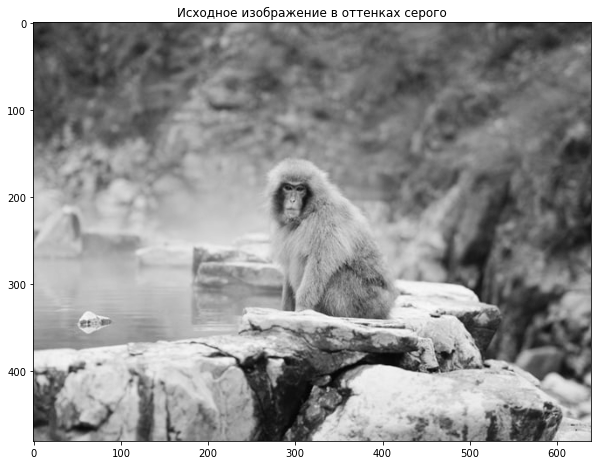

In [18]:
plt.figure(figsize=(10,10))
img = cv.imread(path_to_img, 0)
plt.title("Исходное изображение в оттенках серого")
plt.imshow(img, plt.cm.gray)

In [ ]:
@njit(parallel=True)
def gradient(img: np.ndarray)->np.ndarray:
    x, y = img.shape
    output = np.zeros((x,y), np.uint8)
    for i in prange(1, x):
        for j in prange(1, y):
            s1 = img[i][j]-img[i-1][j]
            s2 = img[i][j]-img[i][j-1]
            output[i][j] = math.hypot(s1,s2)
    return output

def threshold_processing(img: np.ndarray, threshold: np.uint8)->np.ndarray:
    output = np.where(img > threshold, 255, 0)
    return output

In [ ]:
plt.hist(gradient(img), bins=255)

In [ ]:
plt.figure(figsize=(10,10))
img_grad = threshold_processing(gradient(img), 170)
plt.imshow(img_grad, cmap=plt.cm.gray)
plt.title("Метод простого градиента")
plt.show()